## Observations and Insights 

In [152]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem, linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [153]:
# Checking the number of mice.
mouse_count = merged["Mouse ID"].unique()
mouse_count = len(mouse_count)
mouse_count

249

In [154]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged[merged.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_count = len(duplicates['Mouse ID'].unique())
duplicates.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [155]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_view = merged.loc[merged['Mouse ID'] == 'g989']

dup_view.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [156]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_cleaned = merged[merged['Mouse ID'] != 'g989']
mouse_cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [157]:
# Checking the number of mice in the clean DataFrame.
mouse_clean_count = len(mouse_cleaned['Mouse ID'].unique())
mouse_clean_count

248

## Summary Statistics

In [158]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_group = mouse_cleaned.groupby(['Drug Regimen'])
regimen_stats = regimen_group['Tumor Volume (mm3)'].describe()
regimen_mean = regimen_stats['mean']
regimen_median = regimen_group.median()['Tumor Volume (mm3)']
regimen_variance = regimen_group.var()['Tumor Volume (mm3)']
regimen_std = regimen_stats['std']
regimen_sem = regimen_group['Tumor Volume (mm3)'].sem()
regimen_summary = pd.DataFrame({'Mean': regimen_mean, 
                                'Median': regimen_median, 
                                'Variance': regimen_variance, 
                                'Standard Deviation': regimen_std,
                               'Standard Error (SEM)': regimen_sem
                               })
regimen_summary




,Mean,Median,Variance,Standard Deviation,Standard Error (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [159]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary_agg = mouse_cleaned.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
regimen_summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

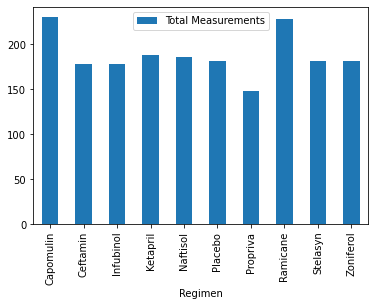

In [258]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
y_axis = regimen_group.count()['Mouse ID']
x_axis = list(y_axis.index.values)
bar_plot = pd.DataFrame({'Regimen':x_axis, 'Total Measurements':y_axis}).plot.bar(x='Regimen', y='Total Measurements', rot=90)
bar_plot

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

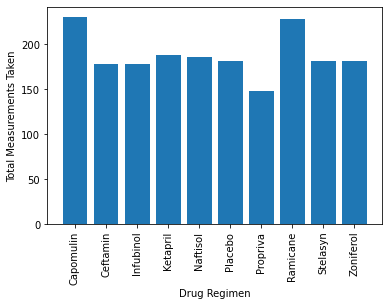

In [260]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(x_axis, y_axis, align='center')
plt.title('Total Measurements Taken Vs. Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Measurements Taken')
plt.xticks(rotation=90)

        Sex Totals  Sex Percentages
Male           125        50.200803
Female         123        49.397590


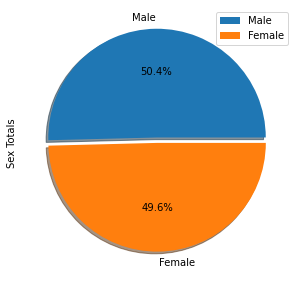

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_id_count = mouse_cleaned.drop_duplicates(subset='Mouse ID')
sex_count = sex_id_count['Sex'].value_counts()
sex_pct = sex_count / mouse_count * 100
sex_df = pd.DataFrame({'Sex Totals': sex_count, 'Sex Percentages': sex_pct})

print(sex_df)
sex_plot = sex_df.plot.pie(y='Sex Totals', autopct='%1.1f%%', figsize=(5,5), shadow=True, explode=(0.05, 0), startangle=0)

Text(0.5, 1.0, 'Percentage of Females and Male Mice')

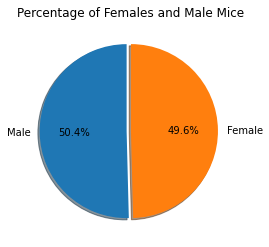

In [261]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_df.index
plt.pie(sex_pct, explode=(0.05, 0), labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of Females and Male Mice')

## Quartiles, Outliers and Boxplots

In [164]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
max_sort = mouse_cleaned.sort_values(by='Timepoint', ascending=False)
max_tp = max_sort.drop_duplicates(subset='Mouse ID', keep='first')
max_filter = max_tp[max_tp['Drug Regimen'].isin(regimen_list)]
max_filter

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
360,g316,Capomulin,Female,22,22,45,40.159220,2
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
350,v923,Capomulin,Female,19,21,45,40.658124,2
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0


In [165]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# for regimen in regimen_list:
#     if regimen in re
#     regimen_dict[regimen] = 
# print(regimen_dict)
# ##--------------------------------##
all_vol_list = []
for regimen in regimen_list:
    volume = max_filter.loc[max_filter['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    all_vol_list.append(volume)
    
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = volume.loc[(volume < lower_bound) | (volume > upper_bound)]
    
    if outliers.empty:
        print(f"{regimen} doesn't seem to have any outliers.")
    else:
        print(f"{regimen}'s outliers are: {outliers}")

## pass in all_vol_list, labels regimen_list


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
#REQUIREMENTS: box/whisk all 4 in same plot, custom color for outliers

Capomulin doesn't seem to have any outliers.
Ramicane doesn't seem to have any outliers.
Infubinol's outliers are: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin doesn't seem to have any outliers.


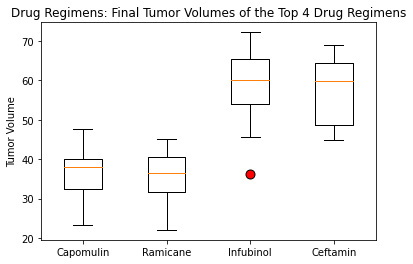

In [262]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimens: Final Tumor Volumes of the Top 4 Drug Regimens')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(all_vol_list, flierprops=dict(markerfacecolor='red', markersize=9))
plt.xticks([1,2,3,4], regimen_list)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume in cubic millimeters (in mm3)')

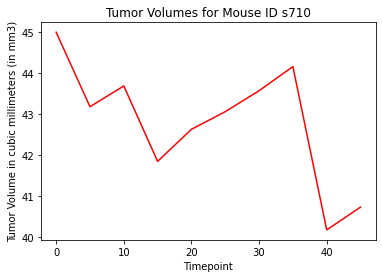

In [269]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
## I decided 
cap_df = mouse_cleaned.loc[mouse_cleaned['Drug Regimen'] == 'Capomulin']
mouse_pick = list(cap_df.sample()['Mouse ID'])
mouse_data = mouse_cleaned.loc[mouse_cleaned['Mouse ID'] == mouse_pick[0]]
pick_x = list(mouse_data['Timepoint'])
pick_y = list(mouse_data['Tumor Volume (mm3)'])
tumor_timepoint = plt.plot(pick_x, pick_y, color="red")
plt.title(f'Tumor Volumes for Mouse ID {mouse_pick[0]}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume in cubic millimeters (in mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

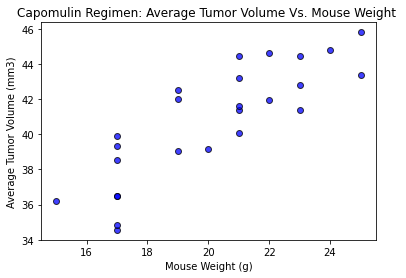

In [267]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_drop = cap_df.drop_duplicates(subset='Mouse ID', keep='first')
cap_x = cap_drop[{'Mouse ID': cap_drop['Mouse ID'], 'Weight (g)': cap_gb['Weight (g)']}]
cap_y = cap_df.groupby('Mouse ID')
cap_y = cap_y['Tumor Volume (mm3)'].mean()

cap_merge = pd.merge(cap_x, cap_y, on='Mouse ID')
x_values = cap_merge['Weight (g)']
y_values = cap_merge['Tumor Volume (mm3)']
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title('Capomulin Regimen: Average Tumor Volume Vs. Mouse Weight ')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.71


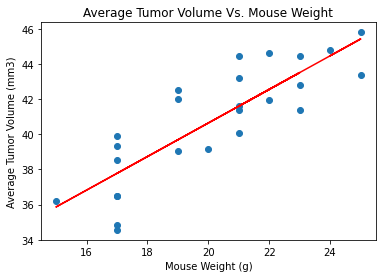

In [266]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.title('Average Tumor Volume Vs. Mouse Weight')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue**2,2)}")
plt.show()

## Reflections on Data:
1. 
2. 
3. 
